# Differential gene expression analysis 

In [21]:
# Installing pydeseq2
#%pip install pydeseq2

In [28]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
import pandas as pd 
print("ready")

ready


## Loading data counts  

In [29]:
df= pd.read_csv("C:/Users/amade/Documents/UofSC/Bioinformatics/Github/counts.csv")
df.head(10)

,Gene_ID,MuSC2_18,MuSC_52,MuSC2_53,Myob2_18,Myob_52,Myob_53
0,ENSMUSG00000000001,5718,5016,4786,6957,5918,4327
1,ENSMUSG00000000028,876,1229,2015,1480,1131,922
2,ENSMUSG00000000037,146,152,122,0,11,10
3,ENSMUSG00000000056,1457,922,615,1610,2936,3164
4,ENSMUSG00000000058,2872,3921,4060,199,399,352
5,ENSMUSG00000000078,13282,19765,14502,1180,2839,2880
6,ENSMUSG00000000085,394,547,545,531,839,775
7,ENSMUSG00000000088,8248,10485,10891,13113,11109,12490
8,ENSMUSG00000000093,0,9,30,1284,383,365
9,ENSMUSG00000000094,651,422,510,198,363,364


In [30]:
# Adding the first column as a index 
counts =df.set_index("Gene_ID")
counts

,MuSC2_18,MuSC_52,MuSC2_53,Myob2_18,Myob_52,Myob_53
Gene_ID,,,,,,
ENSMUSG00000000001,5718,5016,4786,6957,5918,4327
ENSMUSG00000000028,876,1229,2015,1480,1131,922
ENSMUSG00000000037,146,152,122,0,11,10
ENSMUSG00000000056,1457,922,615,1610,2936,3164
ENSMUSG00000000058,2872,3921,4060,199,399,352
...,...,...,...,...,...,...
ENSMUSG00000118423,116,1,31,35,3,8
ENSMUSG00000118425,149,17,114,18,0,6
ENSMUSG00000118434,269,190,385,10,2,4


In [31]:
# Determining the shape of the dataset
counts.shape

(16503, 6)

## Filtering those genes that do not have counts

In [33]:
counts = counts[counts.sum(axis=1) > 0] # If the sum of the counts/per row is more than 0 , keep the row
counts.shape  # None of the genes have 0 counts 

(16503, 6)

In [34]:
# In order to use pydeseq2 we need to transpose the data: GeneIDs being the columns and the samples being the rows.
counts= counts.T
counts

Gene_ID,ENSMUSG00000000001,ENSMUSG00000000028,ENSMUSG00000000037,ENSMUSG00000000056,ENSMUSG00000000058,ENSMUSG00000000078,ENSMUSG00000000085,ENSMUSG00000000088,ENSMUSG00000000093,ENSMUSG00000000094,...,ENSMUSG00000118345,ENSMUSG00000118346,ENSMUSG00000118353,ENSMUSG00000118382,ENSMUSG00000118407,ENSMUSG00000118423,ENSMUSG00000118425,ENSMUSG00000118434,ENSMUSG00000118458,ENSMUSG00000118461
MuSC2_18,5718,876,146,1457,2872,13282,394,8248,0,651,...,25,1377,92,5,79,116,149,269,90,14
MuSC_52,5016,1229,152,922,3921,19765,547,10485,9,422,...,9,1540,86,29,79,1,17,190,52,1
MuSC2_53,4786,2015,122,615,4060,14502,545,10891,30,510,...,29,1550,0,29,93,31,114,385,112,2
Myob2_18,6957,1480,0,1610,199,1180,531,13113,1284,198,...,3,1115,132,17,5,35,18,10,0,164
Myob_52,5918,1131,11,2936,399,2839,839,11109,383,363,...,7,1038,41,44,0,3,0,2,0,30
Myob_53,4327,922,10,3164,352,2880,775,12490,365,364,...,11,1051,89,46,2,8,6,4,0,182


## Creating metadata from scratch 

In [38]:
#creating the metadata
metadata = pd.DataFrame(zip(counts.index,["MuS","MuS","MuS","Myo","Myo","Myo"]),columns=["Samples","Cells"])
metadata= metadata.set_index('Samples')
metadata

,Cells
Samples,
MuSC2_18,MuS
MuSC_52,MuS
MuSC2_53,MuS
Myob2_18,Myo
Myob_52,Myo
Myob_53,Myo


## Performing differential expresion

In [42]:
#Initialzating the dds object
dds= DeseqDataSet(counts=counts, 
                  metadata=metadata, 
                  design_factors="Cells") # giving the data_counts, the metadata and the columns of the cells

In [48]:
dds          # dds.X ...> count_matrix, dds.var....> gene_iDs, dds.obs....>metadata

AnnData object with n_obs × n_vars = 6 × 16503
    obs: 'Cells'
    obsm: 'design_matrix'

In [49]:
dds.deseq2()

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 2.49 seconds.

Fitting dispersion trend curve...
... done in 0.30 seconds.

Fitting MAP dispersions...
... done in 2.29 seconds.

Fitting LFCs...
... done in 1.32 seconds.

Replacing 0 outlier genes.



In [50]:
dds

AnnData object with n_obs × n_vars = 6 × 16503
    obs: 'Cells'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks'

In [51]:
stat_res= DeseqStats(dds,contrast = ("Cells","Myo","MuS"))

In [53]:
stat_res.summary()   #Calculating the stat_res

Log2 fold change & Wald test p-value: Cells Myo vs MuS
                       baseMean  log2FoldChange     lfcSE       stat  \
Gene_ID                                                                
ENSMUSG00000000001  5360.412310        0.165603  0.260899   0.634740   
ENSMUSG00000000028  1253.335607       -0.205042  0.384314  -0.533527   
ENSMUSG00000000037    71.808455       -4.309390  0.881973  -4.886080   
ENSMUSG00000000056  1755.419756        1.379975  0.409321   3.371380   
ENSMUSG00000000058  1923.214003       -3.499743  0.334719 -10.455770   
...                         ...             ...       ...        ...   
ENSMUSG00000118423    31.716968       -1.662624  1.445414  -1.150275   
ENSMUSG00000118425    49.597038       -3.521551  1.250068  -2.817087   
ENSMUSG00000118434   140.135173       -5.702434  0.671511  -8.491950   
ENSMUSG00000118458    41.377250       -8.830728  2.116344  -4.172633   
ENSMUSG00000118461    64.874904        4.488095  1.075283   4.173874   

        

In [56]:
res= stat_res.results_df  # getting the dataframe

In [57]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Gene_ID,,,,,,
ENSMUSG00000000001,5360.412310,0.165603,0.260899,0.634740,5.255981e-01,6.453299e-01
ENSMUSG00000000028,1253.335607,-0.205042,0.384314,-0.533527,5.936691e-01,7.030359e-01
ENSMUSG00000000037,71.808455,-4.309390,0.881973,-4.886080,1.028635e-06,6.928466e-06
ENSMUSG00000000056,1755.419756,1.379975,0.409321,3.371380,7.479264e-04,2.720663e-03
ENSMUSG00000000058,1923.214003,-3.499743,0.334719,-10.455770,1.378743e-25,5.902451e-24
...,...,...,...,...,...,...
ENSMUSG00000118423,31.716968,-1.662624,1.445414,-1.150275,2.500305e-01,3.654991e-01
ENSMUSG00000118425,49.597038,-3.521551,1.250068,-2.817087,4.846136e-03,1.408678e-02
ENSMUSG00000118434,140.135173,-5.702434,0.671511,-8.491950,2.031989e-17,4.798173e-16


## Converting the GeneIDs to symbols using id_map

In [17]:
#%pip install sanbomics

In [58]:
from sanbomics.tools import id_map
print("ready")

ready


In [61]:
mapper = id_map(species="mouse")  # making a mapper specifying "mouse" as organims

In [62]:
mapper.mapper

{'ENSMUSG00000064341': 'Mtnd1',
 'ENSMUSG00000064345': 'mt-Nd2',
 'ENSMUSG00000064351': 'Mtco1',
 'ENSMUSG00000064354': 'Mtco2',
 'ENSMUSG00000064356': 'Mtatp8',
 'ENSMUSG00000064357': 'Mtatp6',
 'ENSMUSG00000064358': 'mt-Co3',
 'ENSMUSG00000064360': 'mt-Nd3',
 'ENSMUSG00000065947': 'Mtnd4l',
 'ENSMUSG00000064363': 'Mtnd4',
 'ENSMUSG00000064367': 'Mtnd5',
 'ENSMUSG00000064368': 'Mtnd6',
 'ENSMUSG00000064370': 'Mt-Cyb',
 'ENSMUSG00000095742': 'CAAA01147332.1',
 'ENSMUSG00000095019': 'AC234645.1',
 'ENSMUSG00000095041': 'AC149090.1',
 'ENSMUSG00000095666': 'AC164084.2',
 'ENSMUSG00000094303': 'AC165294.1',
 'ENSMUSG00000094915': 'AC168977.2',
 'ENSMUSG00000094836': 'AC123873.3',
 'ENSMUSG00000096776': 'Vmn1r186',
 'ENSMUSG00000094722': 'AC125178.1',
 'ENSMUSG00000095250': 'AC133103.4',
 'ENSMUSG00000079800': 'A530040E14Rik',
 'ENSMUSG00000096244': 'AC102264.1',
 'ENSMUSG00000079808': 'AC168977.1',
 'ENSMUSG00000095787': 'AC133103.6',
 'ENSMUSG00000095092': 'AC125149.5',
 'ENSMUSG00000096

In [63]:
# Making a new column in res dataframe
res["Symbol"]=res.index.map(mapper.mapper)
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Gene_ID,,,,,,,
ENSMUSG00000000001,5360.412310,0.165603,0.260899,0.634740,5.255981e-01,6.453299e-01,Gnai3
ENSMUSG00000000028,1253.335607,-0.205042,0.384314,-0.533527,5.936691e-01,7.030359e-01,Cdc45
ENSMUSG00000000037,71.808455,-4.309390,0.881973,-4.886080,1.028635e-06,6.928466e-06,Scml2
ENSMUSG00000000056,1755.419756,1.379975,0.409321,3.371380,7.479264e-04,2.720663e-03,Narf
ENSMUSG00000000058,1923.214003,-3.499743,0.334719,-10.455770,1.378743e-25,5.902451e-24,Cav2
...,...,...,...,...,...,...,...
ENSMUSG00000118423,31.716968,-1.662624,1.445414,-1.150275,2.500305e-01,3.654991e-01,NaN
ENSMUSG00000118425,49.597038,-3.521551,1.250068,-2.817087,4.846136e-03,1.408678e-02,NaN
ENSMUSG00000118434,140.135173,-5.702434,0.671511,-8.491950,2.031989e-17,4.798173e-16,NaN


## Eliminating those genes with a low expression less than 10 baseMean ( arbitrary )

In [67]:
res= res[res.baseMean>=10]

In [68]:
res  # from 16503 genes to 15522 genes

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Gene_ID,,,,,,,
ENSMUSG00000000001,5360.412310,0.165603,0.260899,0.634740,5.255981e-01,6.453299e-01,Gnai3
ENSMUSG00000000028,1253.335607,-0.205042,0.384314,-0.533527,5.936691e-01,7.030359e-01,Cdc45
ENSMUSG00000000037,71.808455,-4.309390,0.881973,-4.886080,1.028635e-06,6.928466e-06,Scml2
ENSMUSG00000000056,1755.419756,1.379975,0.409321,3.371380,7.479264e-04,2.720663e-03,Narf
ENSMUSG00000000058,1923.214003,-3.499743,0.334719,-10.455770,1.378743e-25,5.902451e-24,Cav2
...,...,...,...,...,...,...,...
ENSMUSG00000118423,31.716968,-1.662624,1.445414,-1.150275,2.500305e-01,3.654991e-01,NaN
ENSMUSG00000118425,49.597038,-3.521551,1.250068,-2.817087,4.846136e-03,1.408678e-02,NaN
ENSMUSG00000118434,140.135173,-5.702434,0.671511,-8.491950,2.031989e-17,4.798173e-16,NaN


## Filtering genes to find differentailly expressed genes 

In [69]:
sig = res[(res.padj < 0.05)&(abs(res.log2FoldChange) > 0.05)]
sig

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Gene_ID,,,,,,,
ENSMUSG00000000037,71.808455,-4.309390,0.881973,-4.886080,1.028635e-06,6.928466e-06,Scml2
ENSMUSG00000000056,1755.419756,1.379975,0.409321,3.371380,7.479264e-04,2.720663e-03,Narf
ENSMUSG00000000058,1923.214003,-3.499743,0.334719,-10.455770,1.378743e-25,5.902451e-24,Cav2
ENSMUSG00000000078,8873.183547,-2.770502,0.382004,-7.252551,4.089947e-13,6.519391e-12,Klf6
ENSMUSG00000000093,342.074229,5.722300,1.484436,3.854864,1.157942e-04,5.142871e-04,Tbx2
...,...,...,...,...,...,...,...
ENSMUSG00000118407,42.028892,-5.143769,0.968316,-5.312078,1.083823e-07,8.534913e-07,Gm50457
ENSMUSG00000118425,49.597038,-3.521551,1.250068,-2.817087,4.846136e-03,1.408678e-02,NaN
ENSMUSG00000118434,140.135173,-5.702434,0.671511,-8.491950,2.031989e-17,4.798173e-16,NaN


## Principal component analysis plot 

In [70]:
import scanpy as sc

In [71]:
dds

AnnData object with n_obs × n_vars = 6 × 16503
    obs: 'Cells'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks'

In [141]:
sc.tl.pca(dds)

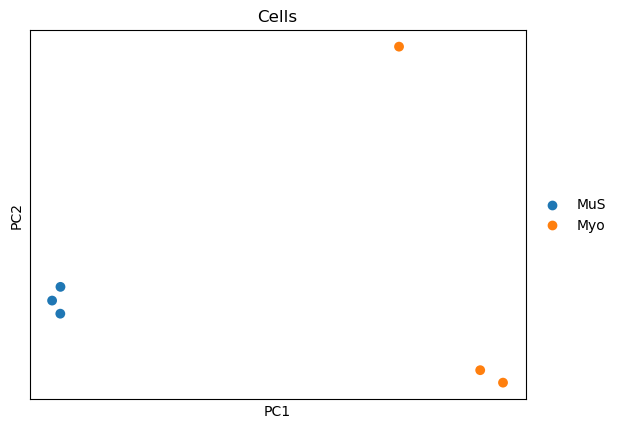

In [142]:
sc.pl.pca(dds,color='Cells', size=200)

## Gene set enrichment analysis ( GSEA )

In [74]:
#pip install gseapy

In [75]:
import gseapy as gp
from gseapy.plot import gseaplot
print("ready")

ready


In [79]:
res  # all the genes detected in the dataset whether differentially expressed or not 

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Gene_ID,,,,,,,
ENSMUSG00000000001,5360.412310,0.165603,0.260899,0.634740,5.255981e-01,6.453299e-01,Gnai3
ENSMUSG00000000028,1253.335607,-0.205042,0.384314,-0.533527,5.936691e-01,7.030359e-01,Cdc45
ENSMUSG00000000037,71.808455,-4.309390,0.881973,-4.886080,1.028635e-06,6.928466e-06,Scml2
ENSMUSG00000000056,1755.419756,1.379975,0.409321,3.371380,7.479264e-04,2.720663e-03,Narf
ENSMUSG00000000058,1923.214003,-3.499743,0.334719,-10.455770,1.378743e-25,5.902451e-24,Cav2
...,...,...,...,...,...,...,...
ENSMUSG00000118423,31.716968,-1.662624,1.445414,-1.150275,2.500305e-01,3.654991e-01,NaN
ENSMUSG00000118425,49.597038,-3.521551,1.250068,-2.817087,4.846136e-03,1.408678e-02,NaN
ENSMUSG00000118434,140.135173,-5.702434,0.671511,-8.491950,2.031989e-17,4.798173e-16,NaN


In [82]:
ranking= res[['Symbol','stat']].dropna().sort_values('stat' ,ascending=False)  # taking the symbol column and the stat +  dropping the N/A values
ranking    # largest stat on top 

,Symbol,stat
Gene_ID,,
ENSMUSG00000029304,Spp1,29.575484
ENSMUSG00000054675,Tmem119,26.533761
ENSMUSG00000091898,Tnnc1,24.451811
ENSMUSG00000035105,Egln3,21.929402
ENSMUSG00000026251,Chrnd,21.089965
...,...,...
ENSMUSG00000030428,Ttyh1,-25.142555
ENSMUSG00000025780,Itih5,-25.348883
ENSMUSG00000022816,Fstl1,-28.391091


In [83]:
# Dropping duplicates 
ranking= ranking.drop_duplicates('Symbol')

In [84]:
ranking

,Symbol,stat
Gene_ID,,
ENSMUSG00000029304,Spp1,29.575484
ENSMUSG00000054675,Tmem119,26.533761
ENSMUSG00000091898,Tnnc1,24.451811
ENSMUSG00000035105,Egln3,21.929402
ENSMUSG00000026251,Chrnd,21.089965
...,...,...
ENSMUSG00000030428,Ttyh1,-25.142555
ENSMUSG00000025780,Itih5,-25.348883
ENSMUSG00000022816,Fstl1,-28.391091


### Doing extra modifications because gp.prerank requires just one colum( stat ) + one index column : Symbol in Uppercase 

In [92]:
ranking1 = ranking.set_index('Symbol')[['stat']]
ranking1.index = ranking1.index.astype(str).str.upper()
ranking1

,stat
Symbol,
SPP1,29.575484
TMEM119,26.533761
TNNC1,24.451811
EGLN3,21.929402
CHRND,21.089965
...,...
TTYH1,-25.142555
ITIH5,-25.348883
FSTL1,-28.391091


## Creating a manual set of genes to look up 

In [93]:
manual_set={"things":["Spp1","Tmem119","Tnnc1","Egln3","Chrnd"]}

In [94]:
gp.get_library_name()   # look the available libraries 

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_2023',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_2024',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'Descartes_Cell_Types_and_Tissue_2021',
 'Diabetes_Perturbatio

In [96]:
# Creating the pre_res object 
pre_res = gp.prerank(rnk= ranking1, gene_sets=['GO_Biological_Process_2023', manual_set] , permutation_num =100, seed=6)

In [97]:
pre_res.res2d.head(5)  # Visualization of the matrix 

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,GO_Biological_Process_2023__Striated Muscle Co...,0.779836,2.831325,0.0,0.0,0.0,28/52,5.88%,TNNC1;TNNI1;CSRP3;PGAM2;TPM1;MYH3;TNNT3;CHRNA1...
1,prerank,GO_Biological_Process_2023__Muscle Contraction...,0.683274,2.669079,0.0,0.0,0.0,34/83,7.22%,CHRND;MYOF;CHRNG;PGAM2;MYL1;TPM1;MYH3;CACNA1S;...
2,prerank,GO_Biological_Process_2023__Myofibril Assembly...,0.771876,2.65833,0.0,0.0,0.0,22/44,5.88%,CSRP3;TPM1;MYH3;TNNT3;SYNPO2L;TNNT1;TCAP;ACTN2...
3,prerank,GO_Biological_Process_2023__Cytoplasmic Transl...,-0.671474,-2.611703,0.0,0.0,0.0,74/90,28.08%,RPL18A;RPS11;RPL31;RPL10A;RPL18;RPL21;RPS19;RP...
4,prerank,GO_Biological_Process_2023__Sarcomere Organiza...,0.793918,2.543151,0.0,0.0,0.0,16/27,5.88%,CSRP3;TPM1;MYH3;TNNT3;SYNPO2L;TNNT1;TCAP;MYPN;...


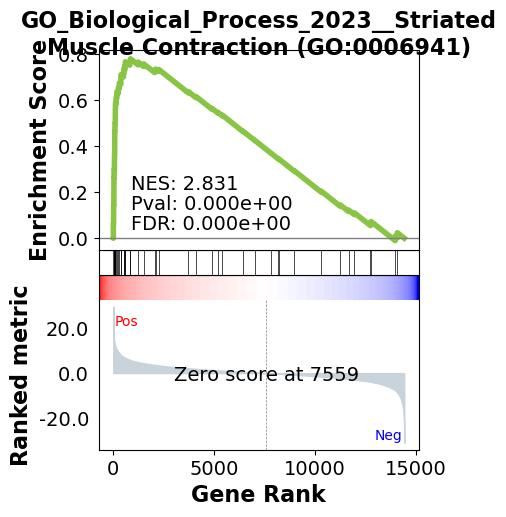

In [103]:
terms = pre_res.res2d.Term
axs = pre_res.plot(terms=terms[0])   # Visualization of the plots, change terms[x] to look different ones 

In [106]:
# Another way to visualize data is ordering the data by term, fdr, enrichmnet score and the normalized enrichment

In [107]:
out=[]
for term in list(pre_res.results):
    out.append([term,pre_res.results[term]['fdr'],
                pre_res.results[term]['es'],
                pre_res.results[term]['nes']])
out_df = pd.DataFrame(out,columns=['Term','fdr','es','nes']).sort_values('fdr').reset_index(drop=True)
out_df

,Term,fdr,es,nes
0,GO_Biological_Process_2023__Muscle Contraction...,0.0,0.683274,2.669079
1,GO_Biological_Process_2023__Extracellular Stru...,0.0,-0.592401,-2.202912
2,GO_Biological_Process_2023__Regulation Of Musc...,0.0,0.775106,2.289228
3,GO_Biological_Process_2023__Myofibril Assembly...,0.0,0.771876,2.658330
4,GO_Biological_Process_2023__Actomyosin Structu...,0.0,0.642059,2.455719
...,...,...,...,...
2244,GO_Biological_Process_2023__Endoplasmic Reticu...,1.0,0.262780,0.650049
2245,GO_Biological_Process_2023__Establishment Of P...,1.0,0.199068,0.625660
2246,GO_Biological_Process_2023__miRNA Processing (...,1.0,0.203227,0.633612
2247,GO_Biological_Process_2023__Regulation Of Neur...,1.0,0.208839,0.557795


### Visualization of different multi-pathways

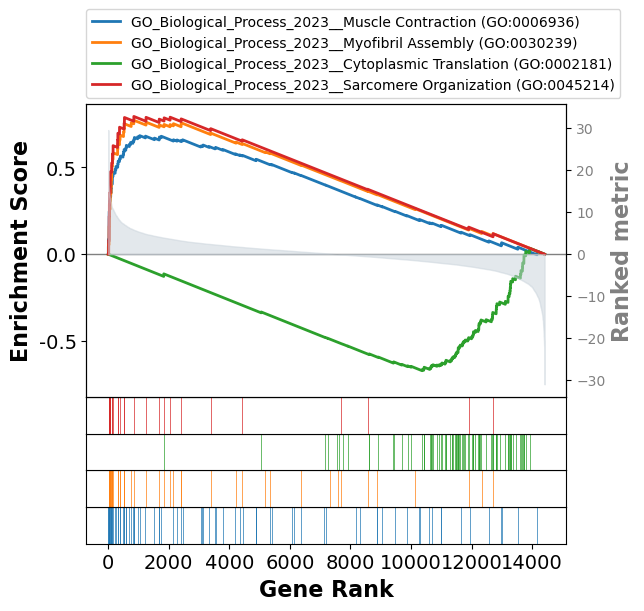

In [122]:
axs = pre_res.plot(terms=terms[1:5],
                   #legend_kws={'loc': (1.2, 0)}, # set the legend loc
                   show_ranking=True, # whether to show the second yaxis
                   figsize=(3,4)
                  )

### Dotplots 

In [126]:
from gseapy import dotplot
import matplotlib.pyplot as plt

In [129]:
pre_res.res2d.head(5) 

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,GO_Biological_Process_2023__Striated Muscle Co...,0.779836,2.831325,0.0,0.0,0.0,28/52,5.88%,TNNC1;TNNI1;CSRP3;PGAM2;TPM1;MYH3;TNNT3;CHRNA1...
1,prerank,GO_Biological_Process_2023__Muscle Contraction...,0.683274,2.669079,0.0,0.0,0.0,34/83,7.22%,CHRND;MYOF;CHRNG;PGAM2;MYL1;TPM1;MYH3;CACNA1S;...
2,prerank,GO_Biological_Process_2023__Myofibril Assembly...,0.771876,2.65833,0.0,0.0,0.0,22/44,5.88%,CSRP3;TPM1;MYH3;TNNT3;SYNPO2L;TNNT1;TCAP;ACTN2...
3,prerank,GO_Biological_Process_2023__Cytoplasmic Transl...,-0.671474,-2.611703,0.0,0.0,0.0,74/90,28.08%,RPL18A;RPS11;RPL31;RPL10A;RPL18;RPL21;RPS19;RP...
4,prerank,GO_Biological_Process_2023__Sarcomere Organiza...,0.793918,2.543151,0.0,0.0,0.0,16/27,5.88%,CSRP3;TPM1;MYH3;TNNT3;SYNPO2L;TNNT1;TCAP;MYPN;...


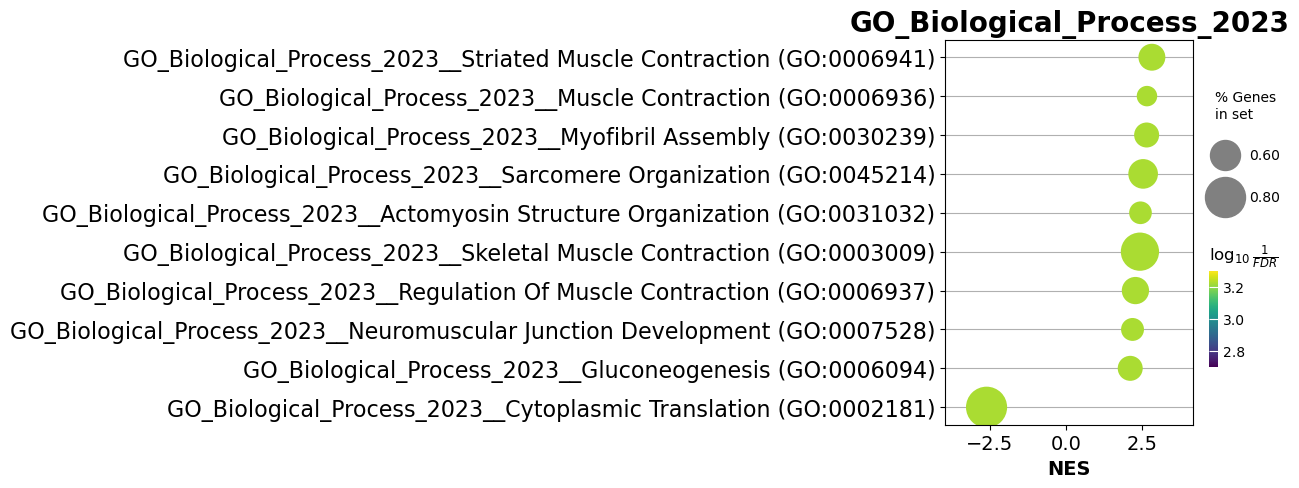

In [130]:
ax = dotplot(pre_res.res2d,
             column="FDR q-val",
             title='GO_Biological_Process_2023',
             cmap=plt.cm.viridis,
             size=6, # adjust dot size
             figsize=(4,5), cutoff=0.25, show_ring=False)

## Creating a heatmap

In [143]:
import numpy as np
import seaborn as sns

In [144]:
dds

AnnData object with n_obs × n_vars = 6 × 16503
    obs: 'Cells'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var', 'pca', 'Cells_colors'
    obsm: 'design_matrix', 'size_factors', 'replaceable', 'X_pca'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted', 'PCs'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'log1p'

In [145]:
dds.layers['normed_counts'] # Normalized counts 

array([[5.58356684e+03, 8.55404783e+02, 1.42567464e+02, ...,
        2.62675670e+02, 8.78840531e+01, 1.36708527e+01],
       [4.88749814e+03, 1.19751499e+03, 1.48106004e+02, ...,
        1.85132505e+02, 5.06678435e+01, 9.74381607e-01],
       [4.68821185e+03, 1.97382927e+03, 1.19507281e+02, ...,
        3.77133632e+02, 1.09711602e+02, 1.95913575e+00],
       [6.92428768e+03, 1.47304093e+03, 0.00000000e+00, ...,
        9.95297928e+00, 0.00000000e+00, 1.63228860e+02],
       [5.79899628e+03, 1.10825698e+03, 1.07788035e+01, ...,
        1.95978245e+00, 0.00000000e+00, 2.93967368e+01],
       [4.27991307e+03, 9.11966686e+02, 9.89117881e+00, ...,
        3.95647152e+00, 0.00000000e+00, 1.80019454e+02]])

In [146]:
dds.layers['log1p']= np.log1p(dds.layers['normed_counts'])   # Creating a log1p values of the normalized counts 
dds

AnnData object with n_obs × n_vars = 6 × 16503
    obs: 'Cells'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var', 'pca', 'Cells_colors'
    obsm: 'design_matrix', 'size_factors', 'replaceable', 'X_pca'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted', 'PCs'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'log1p'

In [147]:
dds.layers['log1p'] # log1p values

array([[8.62776215, 6.75274314, 4.96680506, ..., 5.57471982, 4.48733275,
        2.68586272],
       [8.49464041, 7.08883856, 5.00465749, ..., 5.22645881, 3.94483561,
        0.68025524],
       [8.4530198 , 7.58823723, 4.79171017, ..., 5.93524766, 4.70692864,
        1.08489725],
       [8.84293487, 7.29576284, 0.        , ..., 2.3936115 , 0.        ,
        5.10126094],
       [8.66561256, 7.01144568, 2.4663016 , ..., 1.08511577, 0.        ,
        3.41433526],
       [8.3619216 , 6.81669939, 2.38795318, ..., 1.6006941 , 0.        ,
        5.19860451]])

In [148]:
sig   # matrix with the differentially expressed genes

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Gene_ID,,,,,,,
ENSMUSG00000000037,71.808455,-4.309390,0.881973,-4.886080,1.028635e-06,6.928466e-06,Scml2
ENSMUSG00000000056,1755.419756,1.379975,0.409321,3.371380,7.479264e-04,2.720663e-03,Narf
ENSMUSG00000000058,1923.214003,-3.499743,0.334719,-10.455770,1.378743e-25,5.902451e-24,Cav2
ENSMUSG00000000078,8873.183547,-2.770502,0.382004,-7.252551,4.089947e-13,6.519391e-12,Klf6
ENSMUSG00000000093,342.074229,5.722300,1.484436,3.854864,1.157942e-04,5.142871e-04,Tbx2
...,...,...,...,...,...,...,...
ENSMUSG00000118407,42.028892,-5.143769,0.968316,-5.312078,1.083823e-07,8.534913e-07,Gm50457
ENSMUSG00000118425,49.597038,-3.521551,1.250068,-2.817087,4.846136e-03,1.408678e-02,NaN
ENSMUSG00000118434,140.135173,-5.702434,0.671511,-8.491950,2.031989e-17,4.798173e-16,NaN


In [150]:
dds

AnnData object with n_obs × n_vars = 6 × 16503
    obs: 'Cells'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var', 'pca', 'Cells_colors'
    obsm: 'design_matrix', 'size_factors', 'replaceable', 'X_pca'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted', 'PCs'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'log1p'

In [152]:
# Making a subset of the dds with just the differentially expressed genes 
dds_sigs=dds[:,sig.index]
dds_sigs

View of AnnData object with n_obs × n_vars = 6 × 7014
    obs: 'Cells'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var', 'pca', 'Cells_colors'
    obsm: 'design_matrix', 'size_factors', 'replaceable', 'X_pca'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted', 'PCs'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'log1p'

In [155]:
#Creating a grapher function to make the heatmap
grapher = pd.DataFrame(dds_sigs.layers['log1p'].T,  # transposing this to make the genes each one of the rows 
                       index=dds_sigs.var_names,columns=dds_sigs.obs_names)
grapher                    

Samples,MuSC2_18,MuSC_52,MuSC2_53,Myob2_18,Myob_52,Myob_53
Gene_ID,,,,,,
ENSMUSG00000000037,4.966805,5.004657,4.791710,0.000000,2.466302,2.387953
ENSMUSG00000000056,7.261046,6.801705,6.402637,7.379900,7.964837,8.048970
ENSMUSG00000000058,7.939329,8.248411,8.288546,5.293628,5.971202,5.855557
ENSMUSG00000000078,9.470451,9.865768,9.561468,7.069408,7.931253,7.954955
ENSMUSG00000000093,0.000000,2.279259,3.414016,7.153805,5.930382,5.891722
...,...,...,...,...,...,...
ENSMUSG00000118407,4.358536,4.356403,4.522873,1.787833,0.000000,1.091331
ENSMUSG00000118425,4.987004,2.865879,4.724470,2.939974,0.000000,1.936539
ENSMUSG00000118434,5.574720,5.226459,5.935248,2.393611,1.085116,1.600694


C:\Users\amade\anacon\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\amade\anacon\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


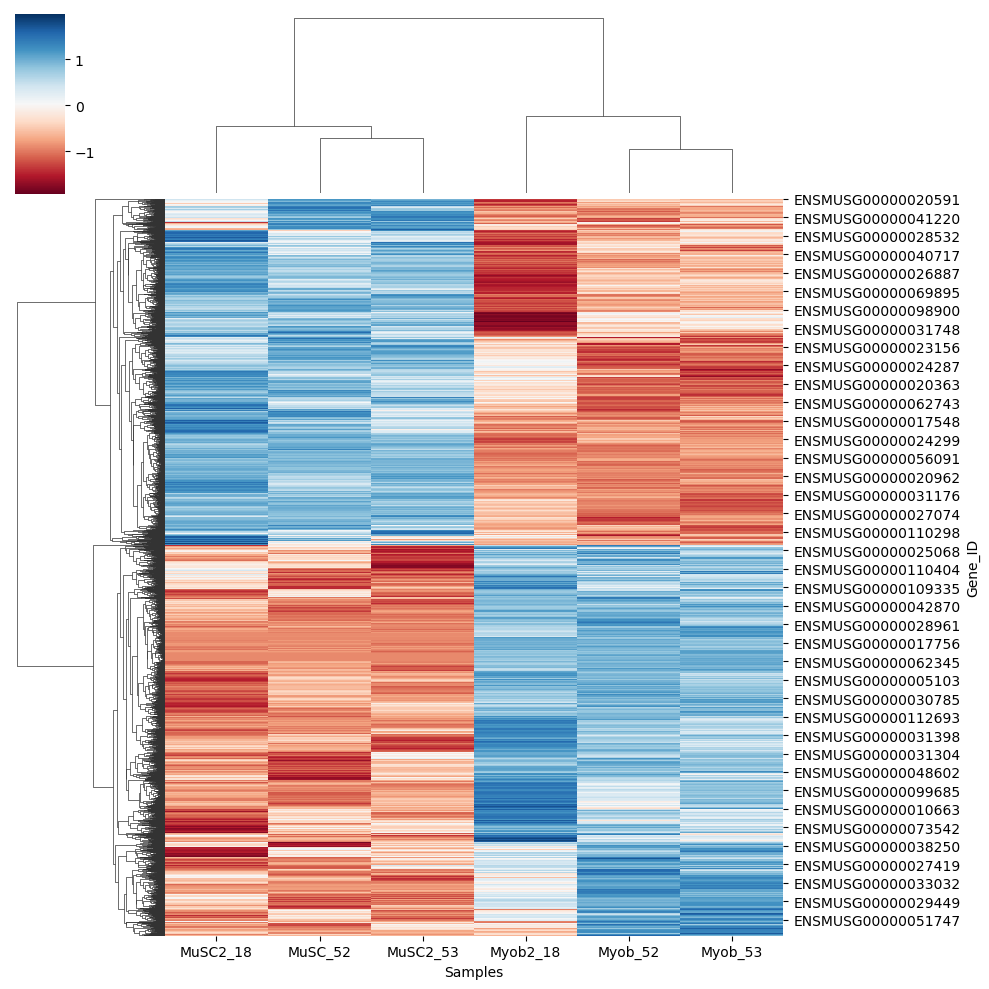

In [158]:
sns.clustermap(grapher,z_score=0,cmap='RdBu')

## Volcano plot 

In [160]:
from sanbomics.plots import volcano 

In [162]:
res  

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Gene_ID,,,,,,,
ENSMUSG00000000001,5360.412310,0.165603,0.260899,0.634740,5.255981e-01,6.453299e-01,Gnai3
ENSMUSG00000000028,1253.335607,-0.205042,0.384314,-0.533527,5.936691e-01,7.030359e-01,Cdc45
ENSMUSG00000000037,71.808455,-4.309390,0.881973,-4.886080,1.028635e-06,6.928466e-06,Scml2
ENSMUSG00000000056,1755.419756,1.379975,0.409321,3.371380,7.479264e-04,2.720663e-03,Narf
ENSMUSG00000000058,1923.214003,-3.499743,0.334719,-10.455770,1.378743e-25,5.902451e-24,Cav2
...,...,...,...,...,...,...,...
ENSMUSG00000118423,31.716968,-1.662624,1.445414,-1.150275,2.500305e-01,3.654991e-01,NaN
ENSMUSG00000118425,49.597038,-3.521551,1.250068,-2.817087,4.846136e-03,1.408678e-02,NaN
ENSMUSG00000118434,140.135173,-5.702434,0.671511,-8.491950,2.031989e-17,4.798173e-16,NaN


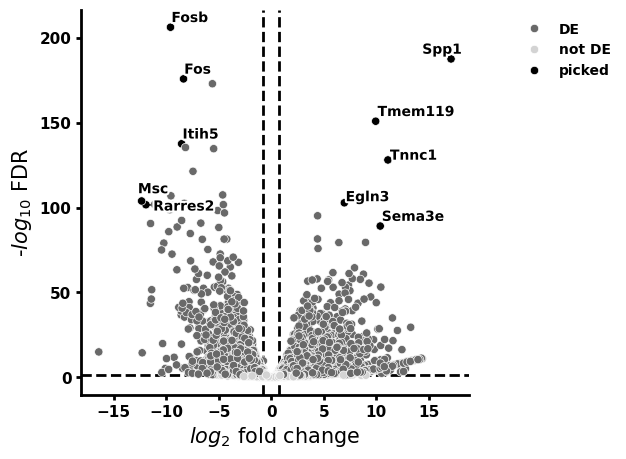

In [163]:
volcano(res,symbol='Symbol')